##NFL Data with Python


#### Installing Packages

In [5]:
#!pip install nfl_data_py
#!pip install pandas
#!pip install os
#!pip install matplotlib
#!pip install seaborn

#### Loading in Packages

In [6]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot") #choose the base style of your plots
pd.options.display.max_columns = 400 #choose max number of rows you want pandas to show you
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#### Loading in Play-by-Play Data

In [7]:
pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


#### Inspecting the dataset

In [8]:
pbp.shape

(49665, 390)

In [9]:
#Filtering for the regular season (First 18 weeks)
pbp = pbp[pbp['week'] <= 18]
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [10]:
print(pbp.columns) #390 columns
print(pbp.dtypes)


Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_players', 'defense_players', 'n_offense', 'n_defense',
       'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route',
       'defense_man_zone_type', 'defense_coverage_type'],
      dtype='object', length=390)
play_id                  float32
game_id                   object
old_game_id               object
home_team                 object
away_team                 object
                          ...   
time_to_throw            float32
was_pressure             float32
route                     object
defense_man_zone_type     object
defense_coverage_type     object
Length: 390, dtype: object


In [11]:
#Analyzing some potential columns of interest
#print(pbp.posteam.unique()) #which team is in possession of the football
#print(pbp.defteam.unique()) #which team is defending
#print(pbp.week.unique()) #what week is it?
#print(pbp.qtr.unique()) #what quarter is it?
#print(pbp.down.unique()) #what down is it?
#print(pbp.time.unique()) #time left in the quarter
#print(pbp.yrdln.unique()) #yardline based on the team's half
#print(pbp.yardline_100.unique()) #yardline based on how far out the posession team is from the redzone
#print(pbp.ydstogo.unique()) #yards to go for another first down or to get the TD
#print(pbp.yards_gained.unique()) #yards gained or lost in the play
#print(pbp.yards_after_catch.unique()) #YAC
#print(pbp.desc.unique()) #general description of the given play
#print(pbp.td_prob.unique()) #probability of offensive team scoring a TD next
#print(pbp.ep.unique()) #estimated expected points with respect to the offensive team for the given play
#print(pbp.wp.unique()) #winning probability for the posteam at the start of the given play
#print(pbp.epa.unique()) #Expected points added (EPA) by the posteam for the given play.

#### Cleaning the Dataset



In [12]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam']) #Drop rows with NAs in those columns
pbp_rp.shape

(35354, 390)

#### Getting Stats

In [13]:
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending = False).head()

,posteam,pass_epa
28,SF,0.297623
8,DAL,0.231999
19,MIA,0.163784
11,GB,0.156521
3,BUF,0.155019


#### Merging the stats together

In [14]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
rush_epa.sort_values(by = 'rush_epa', ascending = False)
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,-0.087735,-0.013017
1,ATL,-0.023836,-0.172797
2,BAL,0.112942,0.011272
3,BUF,0.155019,0.010419
4,CAR,-0.161010,-0.149338


#### Loading in the Logos

In [15]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
range(len(logos))
logos.head(5)

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


#### Merging Team Logos with EPA Data

In [16]:
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')
epa_with_logos.head(5)

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.087735,-0.013017,ARI,logos/ARI.tif
1,ATL,-0.023836,-0.172797,ATL,logos/ATL.tif
2,BAL,0.112942,0.011272,BAL,logos/BAL.tif
3,BUF,0.155019,0.010419,BUF,logos/BUF.tif
4,CAR,-0.161010,-0.149338,CAR,logos/CAR.tif


#### **EPA/Rush v. EPA/Pass**

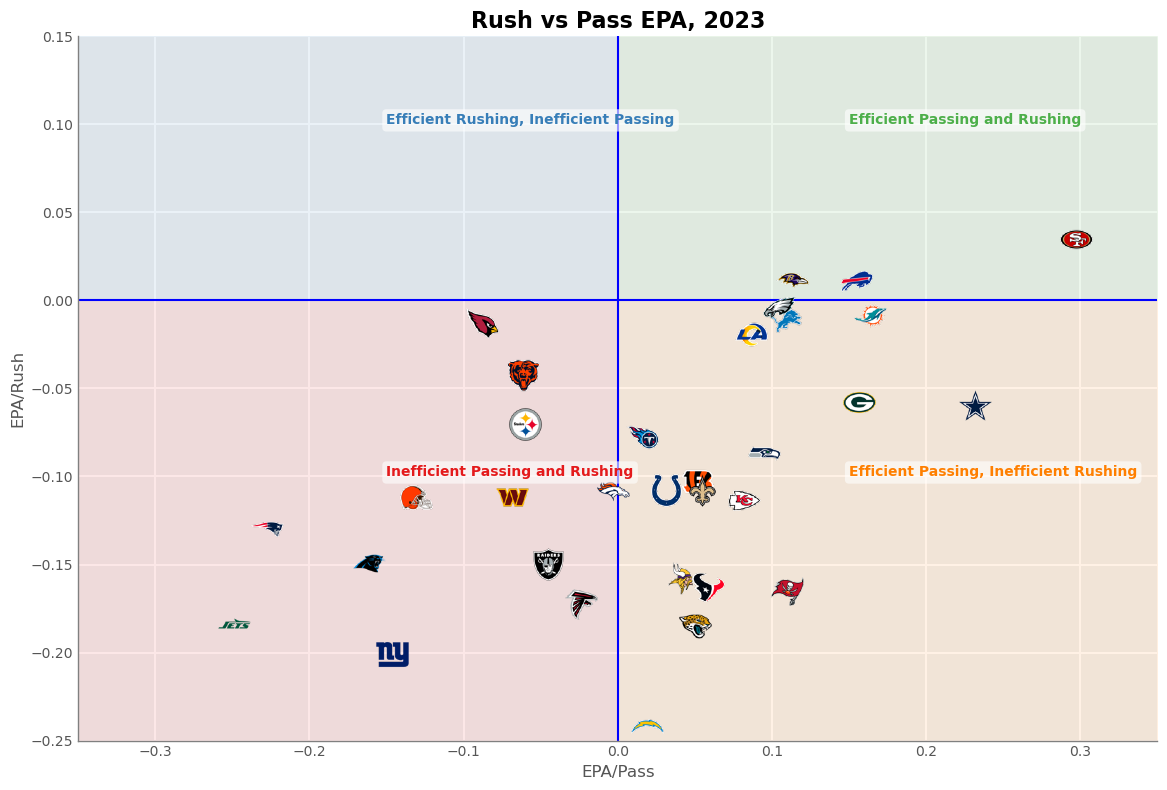

In [19]:
from PIL import Image

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

def resize_image(path, size=(50, 50)):
    image = Image.open(path)
    image = image.resize(size)
    return image

def getImage(image, zoom=0.5):
    return OffsetImage(image, zoom=zoom)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

# Resize all images to the same dimensions
resized_images = [resize_image(path) for path in paths]

# Iterate over each point to add the logos
for x0, y0, image in zip(x, y, resized_images):
    ab = AnnotationBbox(getImage(image, zoom=0.5), (x0, y0), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# Style the plot
ax.set_facecolor('#f0f0f0')  # Light grey background
ax.grid(True, which='both', color='white', linewidth=1.5)  # White grid lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(axis='both', which='both', length=0)  # Remove tick marks

# Set the limits of the plot
plt.xlim(-0.35, 0.35)
plt.ylim(-0.25, 0.15)
plt.title("Rush vs Pass EPA, 2023", fontsize=16, fontweight='bold')
plt.xlabel("EPA/Pass", fontsize=12)
plt.ylabel("EPA/Rush", fontsize=12)

# Add vertical and horizontal lines at x=0 and y=0
plt.axvline(x=0, color='blue', linestyle='-', linewidth=1.5)
plt.axhline(y=0, color='blue', linestyle='-', linewidth=1.5)

# Define the quadrant texts and colors
quadrant_texts = [
    ("Efficient Passing and Rushing", (0.15, 0.10), '#4daf4a'),
    ("Efficient Rushing, Inefficient Passing", (-0.15, 0.10), '#377eb8'),
    ("Efficient Passing, Inefficient Rushing", (0.15, -0.10), '#ff7f00'),
    ("Inefficient Passing and Rushing", (-0.15, -0.10), '#e41a1c')
]

# Add quadrant texts and color background
for text, position, color in quadrant_texts:
    ax.text(position[0], position[1], text, fontsize=10, fontweight='bold', color=color,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.6))

# Add shaded areas to represent each quadrant
plt.fill_betweenx([0, 0.15], 0, 0.35, color='#4daf4a', alpha=0.1)  # Top right
plt.fill_betweenx([0, 0.15], -0.35, 0, color='#377eb8', alpha=0.1)  # Top left
plt.fill_betweenx([-0.25, 0], 0, 0.35, color='#ff7f00', alpha=0.1)  # Bottom right
plt.fill_betweenx([-0.25, 0], -0.35, 0, color='#e41a1c', alpha=0.1)  # Bottom left

plt.show()


#### **Yards After Catch (At least 15 targets)**

In [20]:
receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass': 'count',
        'yards_after_catch': 'sum'}).reset_index().rename(columns = {'receiver_player_name' : 'player', 'pass' : 'targets', 'yards_after_catch' : 'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 75)] #At least targets
receiver_yac.sort_values('yac', ascending = False, inplace = True)

C:\Users\frank\AppData\Local\Temp\ipykernel_13564\1937707232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yac', y='player', data=receiver_yac, palette='viridis', ax=ax)


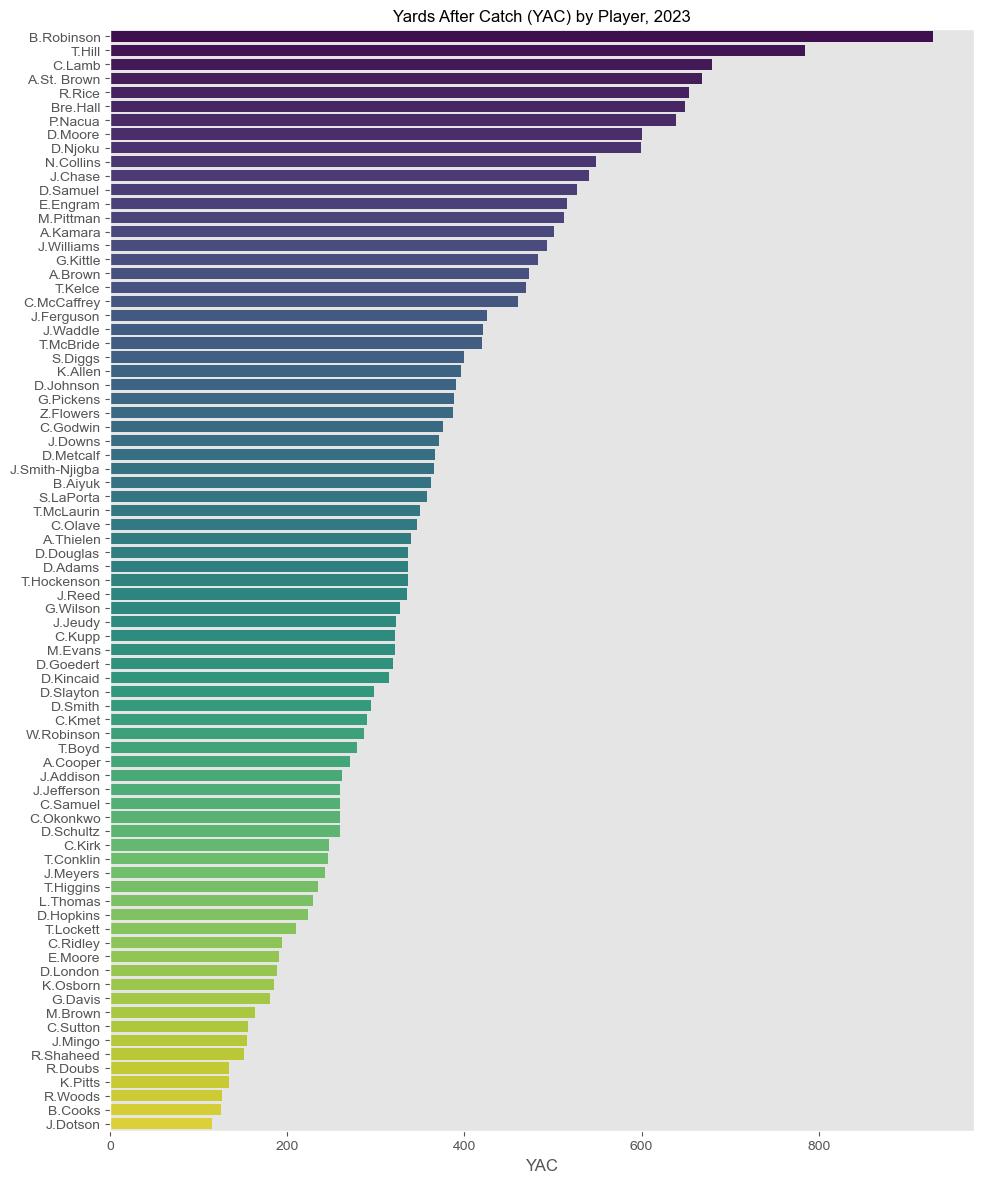

In [21]:
fig, ax = plt.subplots(figsize=(10, 12))

sns.barplot(x='yac', y='player', data=receiver_yac, palette='viridis', ax=ax)

sns.set_theme(style='ticks')

ax.set_title("Yards After Catch (YAC) by Player, 2023")
ax.set_xlabel("YAC")
ax.set_ylabel('')

plt.grid(False)
plt.show()

#### **Most Efficient RBs**

In [22]:
#Which RB is the most efficient running back? YPC with a minimum of 75 carries?
rb_rush = pbp_rp[(pbp_rp['rush'] == 1)].groupby(['posteam','rusher_player_name']).agg({'rush':'count', 'rushing_yards':'sum'}).reset_index().rename(columns = {'posteam':'team','rusher_player_name':'player'})
rb_rush['ypc'] = rb_rush['rushing_yards'] / rb_rush['rush']
rb_rush = pd.merge(rb_rush, logo_data, left_on = 'team', right_on = 'team_abbr')
rb_rush = rb_rush[rb_rush['rush'] >= 150]
rb_rush.sort_values(by = 'ypc', ascending = False).head(10)

,team,player,rush,rushing_yards,ypc,team_abbr,logo_path
301,SF,C.McCaffrey,272,1459.0,5.363971,SF,logos/SF.tif
111,DET,J.Gibbs,182,945.0,5.192308,DET,logos/DET.tif
182,LA,K.Williams,229,1144.0,4.995633,LA,logos/LA.tif
6,ARI,J.Conner,210,1040.0,4.952381,ARI,logos/ARI.tif
222,MIA,R.Mostert,209,1012.0,4.842105,MIA,logos/MIA.tif
38,BUF,J.Cook,237,1122.0,4.734177,BUF,logos/BUF.tif
108,DET,D.Montgomery,220,1015.0,4.613636,DET,logos/DET.tif
281,PHI,D.Swift,229,1049.0,4.580786,PHI,logos/PHI.tif
14,ATL,B.Robinson,214,976.0,4.560748,ATL,logos/ATL.tif
167,KC,I.Pacheco,206,935.0,4.538835,KC,logos/KC.tif


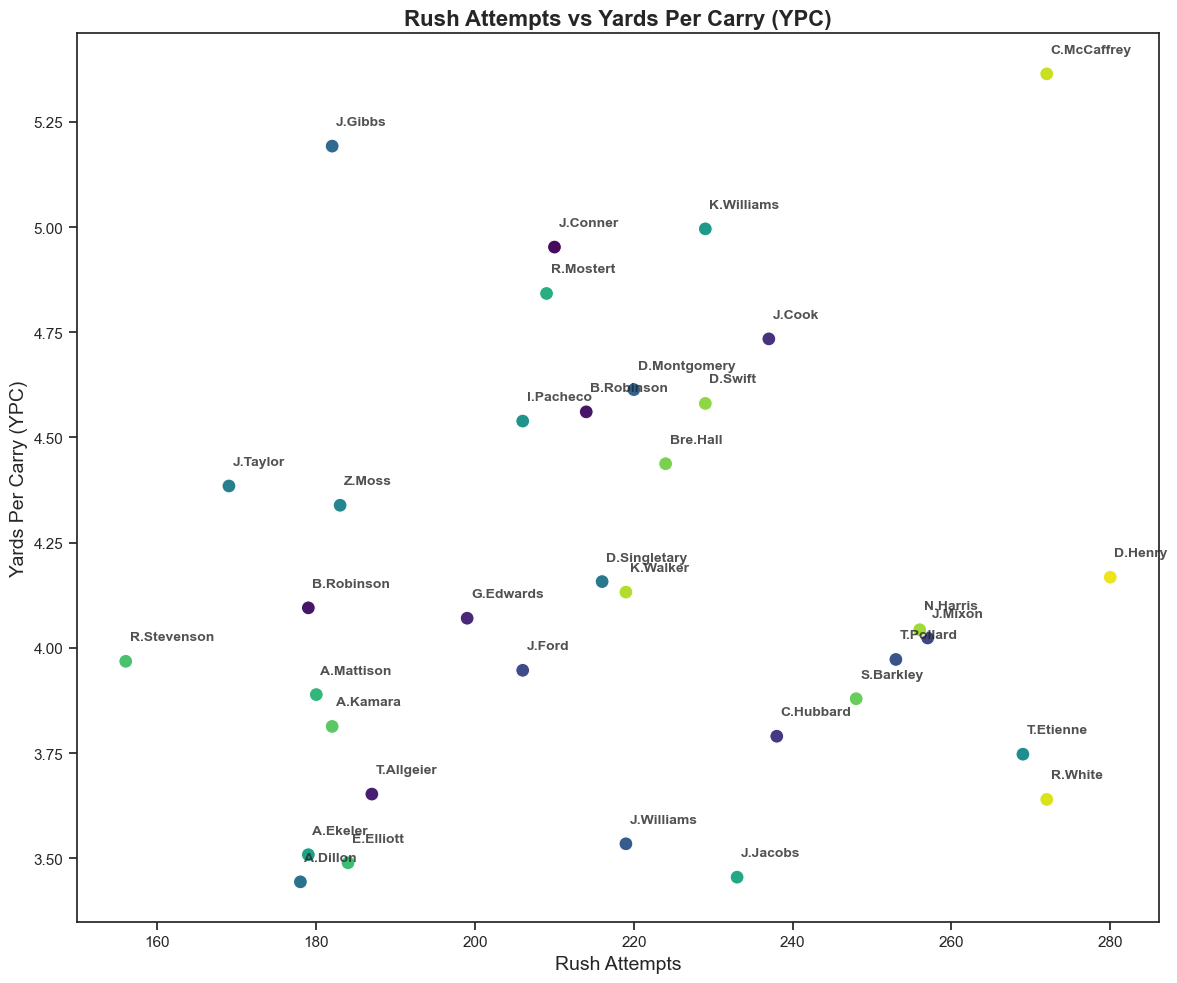

In [23]:
#Lets plot it now (rush attempts vs ypc)
fig, ax = plt.subplots(figsize = (12,10))

scatter = sns.scatterplot(data=rb_rush, x='rush', y='ypc', hue='player', palette='viridis', s=100, ax=ax)

# Adding text annotations for each point in the scatter plot
for index, row in rb_rush.iterrows():
    ax.text(
        x=row['rush'] + 0.5,  # Shift text slightly to the right
        y=row['ypc'] + 0.05,  # Shift text slightly above
        s=row['player'],
        fontsize=10,
        weight='bold',
        alpha=0.8
    )

# Titles and labels
ax.set_title("Rush Attempts vs Yards Per Carry (YPC)", fontsize=16, weight='bold')
ax.set_xlabel("Rush Attempts", fontsize=14)
ax.set_ylabel("Yards Per Carry (YPC)", fontsize=14)

# Legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

#### **Most Valuable Players by EPA this season**

In [24]:
#Which have the most valuable plays using EPAs?
rush_players_epa = pbp_rp[(pbp_rp['rush'] == 1)][['posteam','rusher_player_name', 'epa']].rename(columns = {'rusher_player_name':'player'})
receiver_players_epa = pbp_rp[(pbp_rp['pass'] == 1)][['posteam','receiver_player_name', 'epa']].rename(columns = {'receiver_player_name':'player'})
pass_players_epa = pbp_rp[(pbp_rp['pass'] == 1)][['posteam','passer_player_name', 'epa']].rename(columns = {'passer_player_name':'player'})

players_epa = pd.concat([rush_players_epa, receiver_players_epa, pass_players_epa])
players_epa_top = players_epa.groupby(['posteam','player']).sum('epa').sort_values(by = 'epa', ascending = False).reset_index().head(30)
print(players_epa_top)

   posteam        player         epa
0       SF       B.Purdy  144.701508
1      DAL        C.Lamb  111.908340
2      DAL    D.Prescott  107.612381
3      BUF       J.Allen   95.910576
4      MIA        T.Hill   90.571289
5       GB        J.Love   84.661812
6       SF       B.Aiyuk   81.790466
7      MIA  T.Tagovailoa   81.285950
8      HOU     N.Collins   72.502388
9       LA       P.Nacua   71.675797
10     DET   A.St. Brown   70.604393
11     DET        J.Goff   69.014954
12     PHI       A.Brown   65.872841
13     LAC       K.Allen   64.502098
14     CHI       D.Moore   62.675987
15     CAR     A.Thielen   60.964817
16      SF      G.Kittle   60.240688
17     CIN       J.Chase   55.706398
18      TB       M.Evans   54.088505
19     PHI       J.Hurts   52.097179
20     HOU      C.Stroud   50.792198
21      SF      D.Samuel   50.739105
22     BAL     L.Jackson   50.627468
23      KC       T.Kelce   48.015015
24      TB      C.Godwin   47.659107
25      LA    M.Stafford   46.553101
2

C:\Users\frank\AppData\Local\Temp\ipykernel_13564\143690468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(data=players_epa_top, x='epa', y='player', kind='bar', palette = 'viridis')


<Figure size 1500x1500 with 0 Axes>

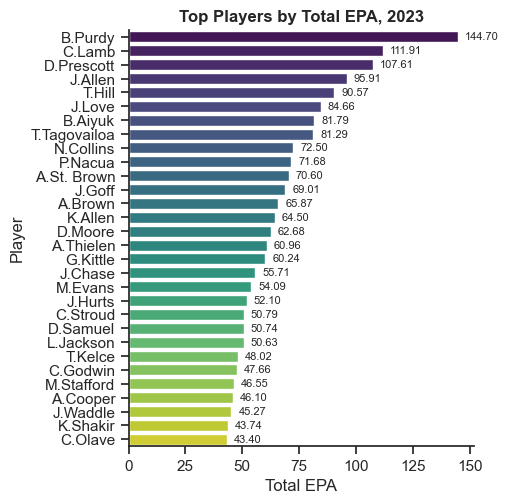

In [25]:
#Lets plot it now
# Set the dimensions (width, height) of the figure
plt.figure(figsize=(15, 15))  # Change the values to adjust the dimensions

# Create the catplot
plot = sns.catplot(data=players_epa_top, x='epa', y='player', kind='bar', palette = 'viridis')
plt.xlabel('Total EPA')
plt.ylabel('Player')
plt.title('Top Players by Total EPA, 2023', fontweight = 'bold')

# Add EPA values at the end of each bar
for idx, ax in enumerate(plot.axes.flat):
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}",
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    fontsize=8)  # Adjust fontsize as needed

plt.show()

In [26]:
#Lets look at some defensive numbers
defense_df = pbp[(pbp['sack'] == 1) | (pbp['interception'] == 1) | (pbp['fumble_lost'] == 1)][['game_id', 'play_id', 'drive', 'defteam', 'sack', 'sack_player_name', 'half_sack_1_player_name', 'half_sack_2_player_name', 'interception', 'interception_player_name', 'fumble_lost', 'fumble_recovery_1_player_name']].reset_index()
defense_df['play_id'] = defense_df['game_id'] + defense_df['play_id'].astype(str) + defense_df['drive'].astype(str)
defense_df.drop(columns = ['game_id', 'drive'], inplace = True)
defense_df.head()

,index,play_id,defteam,sack,sack_player_name,half_sack_1_player_name,half_sack_2_player_name,interception,interception_player_name,fumble_lost,fumble_recovery_1_player_name
0,38,2023_01_ARI_WAS1010.05.0,ARI,1.0,L.Fotu,None,None,0.0,None,0.0,None
1,42,2023_01_ARI_WAS1140.05.0,ARI,0.0,None,None,None,1.0,Z.Collins,0.0,None
2,55,2023_01_ARI_WAS1449.07.0,ARI,0.0,None,None,None,0.0,None,1.0,Z.Collins
3,59,2023_01_ARI_WAS1581.08.0,WAS,1.0,None,M.Sweat,A.Anderson,0.0,None,0.0,None
4,62,2023_01_ARI_WAS1657.09.0,ARI,1.0,J.Ledbetter,None,None,0.0,None,0.0,None


####**Top Players by Sacks, Interceptions and Fumble Recoveries**

In [27]:
#Top players by sacks
defense_df.groupby(['defteam', 'sack_player_name']).sum(['sack']).sort_values('sack', ascending = False).reset_index()[['defteam', 'sack_player_name', 'sack']].head(20)

#Top players by interceptions
defense_df.groupby(['defteam', 'interception_player_name']).sum(['interception']).sort_values('interception', ascending = False).reset_index()[['defteam', 'interception_player_name', 'interception']].head(20)

#Top players by fumbles recovered
defense_df.groupby(['defteam', 'fumble_recovery_1_player_name']).sum(['fumble_lost']).sort_values('fumble_lost', ascending = False).reset_index()[['defteam', 'fumble_recovery_1_player_name', 'fumble_lost']].head(20)


,defteam,fumble_recovery_1_player_name,fumble_lost
0,NYG,M.McFadden,4.0
1,TB,A.Winfield,4.0
2,KC,W.Gay,3.0
3,DEN,J.Jewell,3.0
4,BUF,T.Bernard,3.0
5,PIT,T.Watt,3.0
6,JAX,A.Blackson,3.0
7,LA,A.Witherspoon,2.0
8,PIT,D.Kazee,2.0
9,CHI,T.Edwards,2.0


#### **Best stadiums for Exciting Games, 2023**

In [28]:
#Which stadiums have seen the most points this year? (Home + Away team)
match_results = pbp[['game_id', 'home_team', 'away_team', 'week', 'home_score', 'away_score', 'result', 'total']].drop_duplicates().reset_index()
match_results['result'] = match_results['result'].abs()
stadium_results = match_results.groupby('home_team').agg({'total':'sum', 'result' : 'mean'}).reset_index()[['home_team', 'total', 'result']].rename(columns = {'home_team' : 'stadium'})

#Creating two new columns with assign
stadium_results = stadium_results.assign(rank_total=stadium_results['total'].rank(ascending=False),
                                         rank_result=stadium_results['result'].rank(ascending=True))

#Stadiums with best games on average
stadium_results['rank_diff'] = (stadium_results['rank_total'] - stadium_results['rank_result']).abs()
stadium_results = stadium_results[(stadium_results['rank_total'] <= 16) & (stadium_results['rank_result'] <= 16)].sort_values(by = 'rank_diff', ascending = True).reset_index().drop(columns = 'index')

C:\Users\frank\AppData\Local\Temp\ipykernel_13564\1970232730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rank_diff', y='stadium', data=stadium_results, palette='viridis')


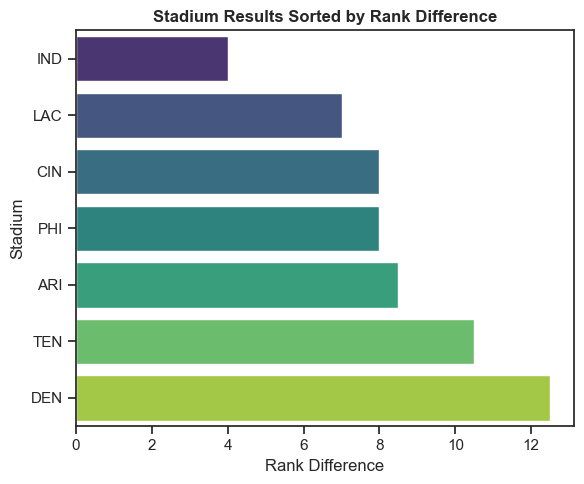

In [29]:
# Create horizontal bar plot using Seaborn
plt.figure(figsize=(6, 5))
sns.barplot(x='rank_diff', y='stadium', data=stadium_results, palette='viridis')

# Add labels and title
plt.xlabel('Rank Difference')
plt.ylabel('Stadium')
plt.title('Stadium Results Sorted by Rank Difference', fontweight = 'bold')

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

#### **Avg. Yards per Offensive Snap**

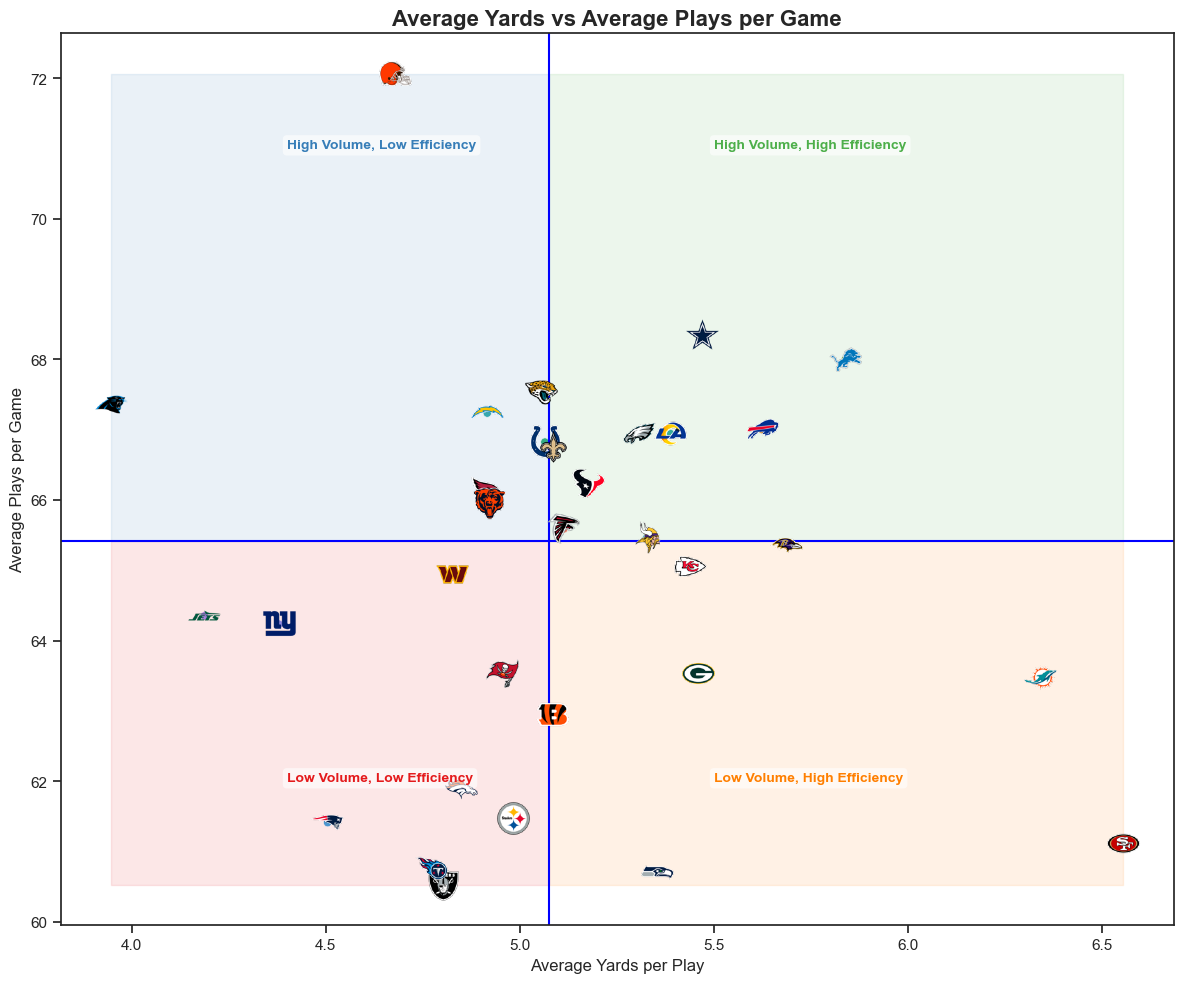

In [35]:
#df of offensive plays
pbp_play = pbp[['game_id', 'play_id', 'posteam', 'drive', 'yardline_100', 'yards_gained', 'rushing_yards', 'passing_yards', 'receiving_yards', 'penalty_yards', 'touchdown', 'pass', 'rush']].drop_duplicates()
offense_plays = pbp_play[(pbp_play['rush'] == 1) | (pbp_play['pass'] == 1)]
offense_plays= offense_plays.groupby('posteam').agg({'yards_gained':'mean','play_id':'count', 'game_id':'nunique'}).reset_index()
offense_plays['avg_plays_per_game'] = offense_plays['play_id'] / offense_plays['game_id']

# Merge offense_plays with logo_data
offense_plays = pd.merge(offense_plays, logo_data, left_on='posteam', right_on='team_abbr')

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=offense_plays, x='yards_gained', y='avg_plays_per_game', hue='posteam', legend=False)

# Add logos as annotations using Matplotlib
def resize_image(path, size=(50, 50)):
    image = Image.open(path)
    image = image.resize(size)
    return image

def getImage(image, zoom=0.5):
    return OffsetImage(image, zoom=zoom)

# Resize all images to the same dimensions
resized_images = [resize_image(path) for path in offense_plays['logo_path']]

# Iterate over each point to add the logos
for x0, y0, image in zip(offense_plays['yards_gained'], offense_plays['avg_plays_per_game'], resized_images):
    plt.gca().add_artist(AnnotationBbox(getImage(image), (x0, y0), frameon=False))

# Add vertical and horizontal lines if needed
plt.axvline(x=offense_plays['yards_gained'].median(), color='blue', linestyle='-')  # Vertical line at x=0
plt.axhline(y=offense_plays['avg_plays_per_game'].median(), color='blue', linestyle='-')  # Horizontal line at y=0

# Define the quadrant texts and colors
quadrant_texts = [
    ("High Volume, High Efficiency", (5.5, 71), '#4daf4a'),
    ("High Volume, Low Efficiency", (4.4, 71), '#377eb8'),
    ("Low Volume, High Efficiency", (5.5, 62), '#ff7f00'),
    ("Low Volume, Low Efficiency", (4.4, 62), '#e41a1c')
]

# Add shaded areas to represent each quadrant dynamically
x_median = offense_plays['yards_gained'].median()
y_median = offense_plays['avg_plays_per_game'].median()
x_min, x_max = offense_plays['yards_gained'].min(), offense_plays['yards_gained'].max()
y_min, y_max = offense_plays['avg_plays_per_game'].min(), offense_plays['avg_plays_per_game'].max()

# Add shaded areas to represent each quadrant
plt.fill_between([x_median, x_max], y_median, y_max, color='#4daf4a', alpha=0.1)  # Top right
plt.fill_between([x_min, x_median], y_median, y_max, color='#377eb8', alpha=0.1)  # Top left
plt.fill_between([x_median, x_max], y_min, y_median, color='#ff7f00', alpha=0.1)  # Bottom right
plt.fill_between([x_min, x_median], y_min, y_median, color='#e41a1c', alpha=0.1)  # Bottom left

# Add quadrant texts and color background
for text, position, color in quadrant_texts:
    plt.text(position[0], position[1], text, fontsize=10, fontweight='bold', color=color,
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.6))


plt.title("Average Yards vs Average Plays per Game", fontsize=16, fontweight='bold')
plt.xlabel("Average Yards per Play", fontsize=12)
plt.ylabel("Average Plays per Game", fontsize=12)

plt.tight_layout()
plt.show()

#### **Catches per TD**

In [36]:
#Catches per TD
pass_td = pbp[pbp['pass_touchdown'] == True].groupby('receiver_player_name')['pass_touchdown'].count().reset_index()
catches = pbp[pbp['complete_pass'] == True].groupby('receiver_player_name')['complete_pass'].count().reset_index().\
rename(columns = {'complete_pass':'receptions'})

In [37]:
catches_per_td = pd.merge(pass_td, catches, on = 'receiver_player_name', how = 'inner')
catches_per_td['catches_per_td'] = catches_per_td['receptions'] / catches_per_td['pass_touchdown']
catches_per_td = catches_per_td[catches_per_td['receptions'] >= 50].sort_values(by = 'catches_per_td', ascending = True)
catches_per_td = catches_per_td.head(30)

C:\Users\frank\AppData\Local\Temp\ipykernel_13564\1182522794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(data=catches_per_td, x='catches_per_td', y='receiver_player_name', kind='bar', palette = 'rocket', aspect=0.8, height=10, margin_titles=True)


<Figure size 1500x1500 with 0 Axes>

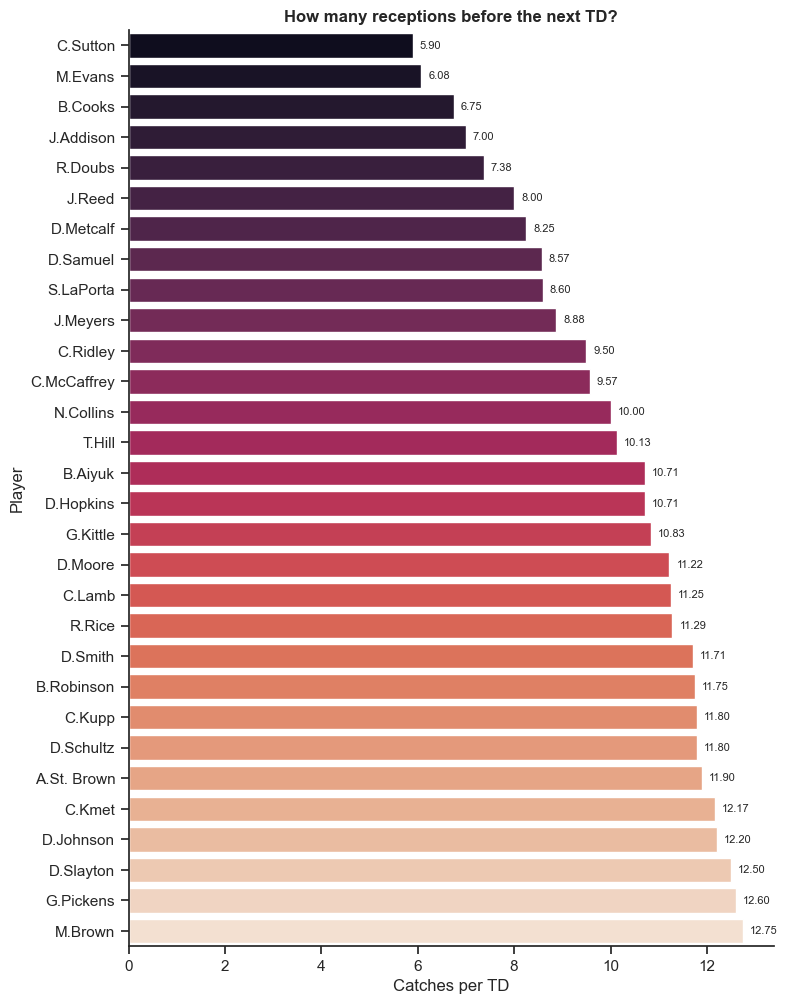

In [38]:
# Create the catplot
plt.figure(figsize=(15, 15))  # Change the values to adjust the dimensions

plot = sns.catplot(data=catches_per_td, x='catches_per_td', y='receiver_player_name', kind='bar', palette = 'rocket', aspect=0.8, height=10, margin_titles=True)
plt.xlabel('Catches per TD')
plt.ylabel('Player')
plt.title('How many receptions before the next TD?', fontweight = 'bold')

# Add EPA values at the end of each bar
for idx, ax in enumerate(plot.axes.flat):
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}",
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    fontsize=8)  # Adjust fontsize as needed

plt.show()

#### **Throwing Distance over Yards To Go (Completed Passes)**

In [39]:
#Aggressivenes in throws by QB (Depth of Target vs Yards to go) air_yards, passing_yards, passer_player_name,
total_yds_qb = pbp[pbp['complete_pass'] == True].groupby('passer_player_name').agg({'passing_yards':'sum', 'air_yards':'sum', 'ydstogo':'sum','pass_attempt':'count'}).reset_index()
pass_yards_per_down = pbp[pbp['complete_pass'] == True].groupby(['passer_player_name', 'down']).agg({'passing_yards':'sum', 'air_yards':'sum', 'pass_attempt':'count', 'ydstogo':'sum'}).reset_index()

#Throw Aggressiveness = Air Yards / Yards to Go
total_yds_qb['throw_aggressiveness'] = total_yds_qb['air_yards'] / total_yds_qb['ydstogo']
total_yds_qb = total_yds_qb[total_yds_qb['pass_attempt'] > 50].sort_values(by = 'throw_aggressiveness', ascending = False).reset_index().head(32)

In [40]:
pass_yards_per_down['throw_aggressiveness'] = pass_yards_per_down['air_yards'] / pass_yards_per_down['ydstogo']

pass_attempts_per_player = pass_yards_per_down.groupby('passer_player_name')['pass_attempt'].sum()
passer_attempts = pass_attempts_per_player[pass_attempts_per_player > 50].index
pass_yards_per_down = pass_yards_per_down[pass_yards_per_down['passer_player_name'].isin(passer_attempts)]

pass_yards_per_down_sorted = pass_yards_per_down.sort_values(by='throw_aggressiveness', ascending=False)

# Select the top 10 passer_player_names for each down category
top_10qb_per_down = pass_yards_per_down_sorted[pass_yards_per_down_sorted['down'] < 4].groupby('down').head(10)

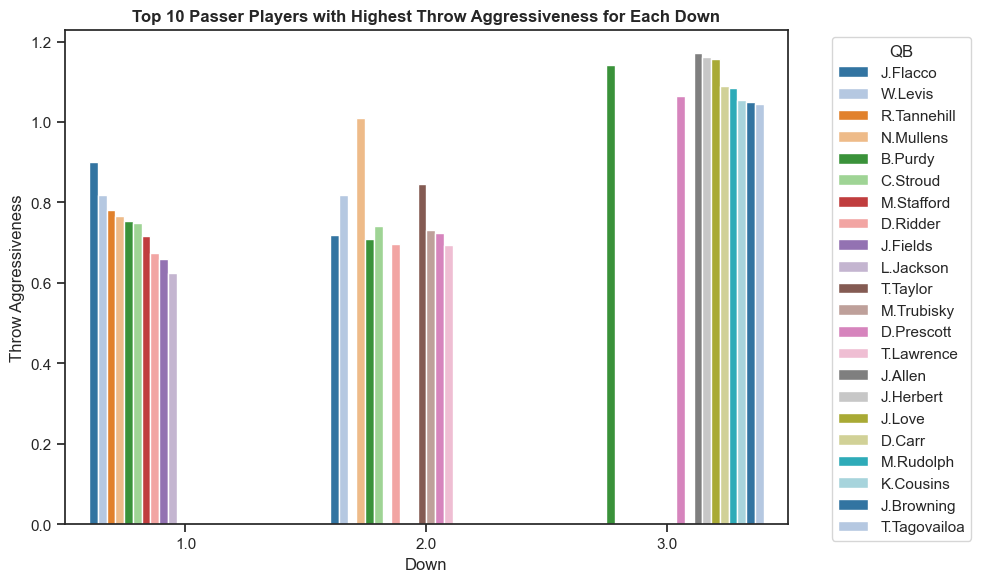

In [41]:
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='down', y='throw_aggressiveness', hue='passer_player_name', data=top_10qb_per_down, palette='tab20')

plt.title('Top 10 Passer Players with Highest Throw Aggressiveness for Each Down', fontweight = 'bold')
plt.xlabel('Down')
plt.ylabel('Throw Aggressiveness')
plt.legend(title='QB', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

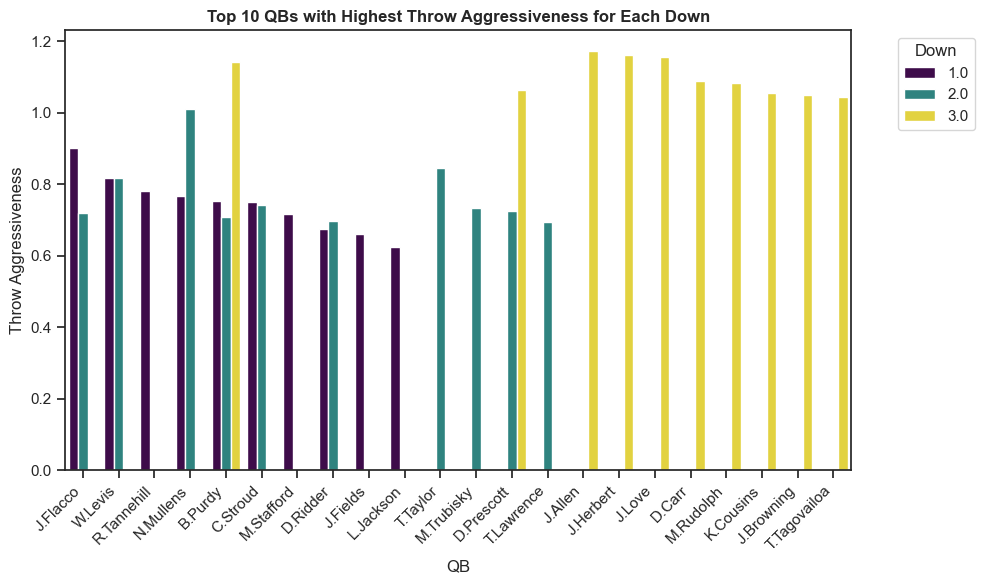

In [42]:
pass_yards_per_down['throw_aggressiveness'] = pass_yards_per_down['air_yards'] / pass_yards_per_down['ydstogo']

pass_attempts_per_player = pass_yards_per_down.groupby('passer_player_name')['pass_attempt'].sum()
passer_attempts = pass_attempts_per_player[pass_attempts_per_player > 50].index
pass_yards_per_down = pass_yards_per_down[pass_yards_per_down['passer_player_name'].isin(passer_attempts)]

pass_yards_per_down_sorted = pass_yards_per_down.sort_values(by=['down', 'throw_aggressiveness'], ascending=[True, False])

# Select the top 10 passer_player_names for each down category
top_10qb_per_down = pass_yards_per_down_sorted[pass_yards_per_down_sorted['down'] < 4].groupby('down').head(10)

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='passer_player_name', y='throw_aggressiveness', hue='down', data=top_10qb_per_down, palette='viridis')
plt.title('Top 10 QBs with Highest Throw Aggressiveness for Each Down', fontweight = 'bold')
plt.xlabel('QB')
plt.ylabel('Throw Aggressiveness')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Down', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\frank\AppData\Local\Temp\ipykernel_13564\3554813677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(data=total_yds_qb, x='throw_aggressiveness', y='passer_player_name', kind='bar', palette = 'rocket', aspect=0.8, height=10, margin_titles=True)


<Figure size 1500x1500 with 0 Axes>

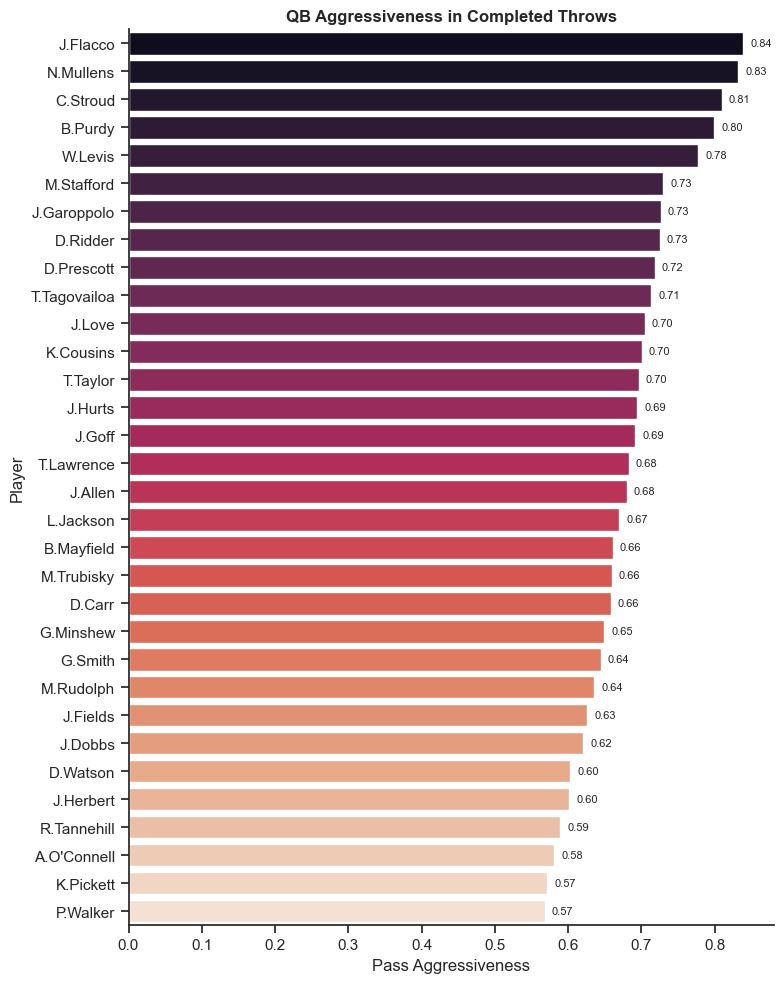

In [43]:
# Create the catplot
plt.figure(figsize=(15, 15))  # Change the values to adjust the dimensions

plot = sns.catplot(data=total_yds_qb, x='throw_aggressiveness', y='passer_player_name', kind='bar', palette = 'rocket', aspect=0.8, height=10, margin_titles=True)
plt.xlabel('Pass Aggressiveness')
plt.ylabel('Player')
plt.title('QB Aggressiveness in Completed Throws', fontweight = 'bold')

# Add EPA values at the end of each bar
for idx, ax in enumerate(plot.axes.flat):
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}",
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    fontsize=8)  # Adjust fontsize as needed
plt.tight_layout()
plt.show()